<a href="https://colab.research.google.com/github/RajezMariner/Deep_Learning/blob/master/LessonPets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torch.nn.functional")

from fastai.vision import *
from fastai.metrics import error_rate
from pathlib import PosixPath
import numpy as np

In [ ]:
URLs.PETS

'https://s3.amazonaws.com/fast-ai-imageclas/oxford-iiit-pet'

In [ ]:
data = untar_data(URLs.PETS)

In [ ]:
data.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images')]

In [ ]:
image_path = data/'images'
image_annotations = data/'annotations'

In [ ]:
fnames = get_image_files(image_path)

In [ ]:
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Bengal_100.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Persian_34.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/miniature_pinscher_24.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Persian_98.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_100.jpg')]

In [ ]:
pat = r'/([^/]+)_\d+.jpg$'
batch_size=50

In [ ]:
data_bunch = ImageDataBunch.from_name_re(fnames=fnames, path=image_path, pat=pat, bs=batch_size, ds_tfms=get_transforms(), size=200).normalize(imagenet_stats)

In [ ]:
data_bunch.device

device(type='cuda')

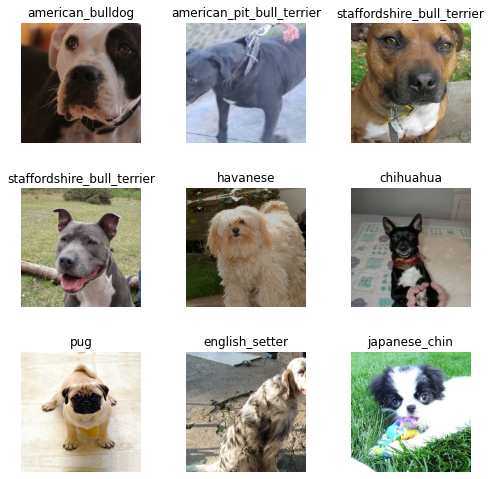

In [ ]:
data_bunch.show_batch(rows=3, figsize=(7,7))

In [ ]:
data_bunch.classes

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

In [ ]:
len(data_bunch.classes), data_bunch.c

(37, 37)

In [ ]:
learn = cnn_learner(data=data_bunch, base_arch=models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth


In [ ]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
          (0): Conv2d(64, 256

In [ ]:
learn.metrics

[<function fastai.metrics.error_rate>]

In [ ]:
learn.lr_find()

epoch,train_loss,valid_loss,error_rate,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


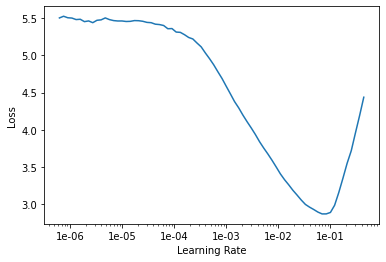

In [ ]:
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.937358,0.307451,0.094723,01:38
1,0.544735,0.323593,0.106901,01:36
2,0.439602,0.308359,0.097429,01:36
3,0.348346,0.329397,0.096076,01:35
4,0.260695,0.214930,0.061570,01:35
5,0.208083,0.212889,0.068336,01:35
6,0.160377,0.198017,0.059540,01:35
7,0.117305,0.192059,0.057510,01:35


In [ ]:
learn.save('stage-1')

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
loss, idx = interp.top_losses()

In [ ]:
len(data_bunch.valid_ds)==len(loss)==len(idx)

True

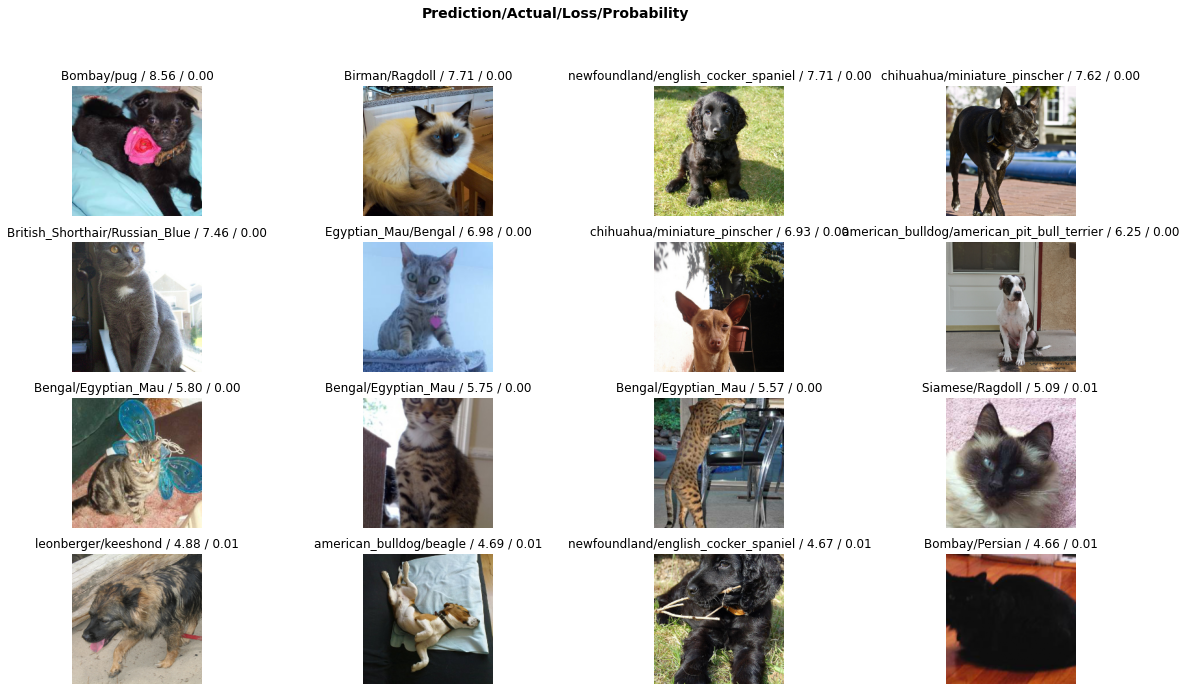

In [ ]:
interp.plot_top_losses(16, figsize=(20,11))

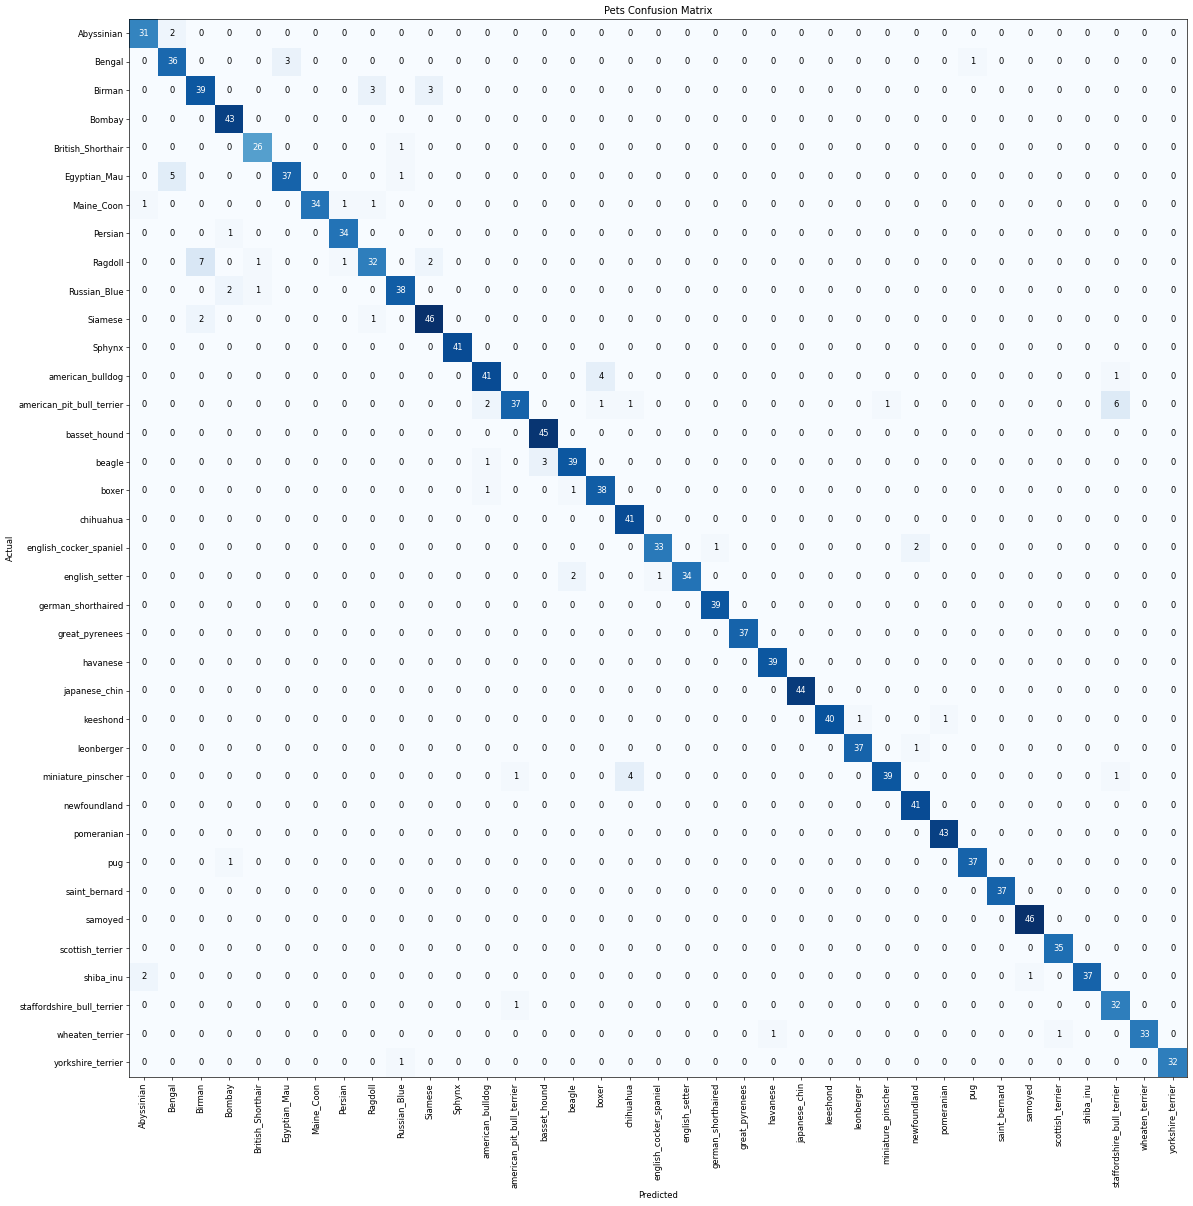

In [ ]:
interp.plot_confusion_matrix(title='Pets Confusion Matrix', figsize=(20,20), dpi=60)

In [ ]:
interp.most_confused()

[('Ragdoll', 'Birman', 7),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 6),
 ('Egyptian_Mau', 'Bengal', 5),
 ('american_bulldog', 'boxer', 4),
 ('miniature_pinscher', 'chihuahua', 4),
 ('Bengal', 'Egyptian_Mau', 3),
 ('Birman', 'Ragdoll', 3),
 ('Birman', 'Siamese', 3),
 ('beagle', 'basset_hound', 3),
 ('Abyssinian', 'Bengal', 2),
 ('Ragdoll', 'Siamese', 2),
 ('Russian_Blue', 'Bombay', 2),
 ('Siamese', 'Birman', 2),
 ('american_pit_bull_terrier', 'american_bulldog', 2),
 ('english_cocker_spaniel', 'newfoundland', 2),
 ('english_setter', 'beagle', 2),
 ('shiba_inu', 'Abyssinian', 2),
 ('Bengal', 'pug', 1),
 ('British_Shorthair', 'Russian_Blue', 1),
 ('Egyptian_Mau', 'Russian_Blue', 1),
 ('Maine_Coon', 'Abyssinian', 1),
 ('Maine_Coon', 'Persian', 1),
 ('Maine_Coon', 'Ragdoll', 1),
 ('Persian', 'Bombay', 1),
 ('Ragdoll', 'British_Shorthair', 1),
 ('Ragdoll', 'Persian', 1),
 ('Russian_Blue', 'British_Shorthair', 1),
 ('Siamese', 'Ragdoll', 1),
 ('american_bulldog', 'stafford